https://www.youtube.com/watch?v=YncZ0WwxyzU

In [1]:
import numpy as np
import pandas as pd


In [2]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('playing') # example

'play'

In [5]:
data=pd.read_csv('spam.csv', encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5166,ham,Y she dun believe leh? I tot i told her it's t...,NaN,NaN,NaN
2584,ham,Hi happy birthday. Hi hi hi hi hi hi hi,NaN,NaN,NaN
1943,ham,I got lousy sleep. I kept waking up every 2 ho...,NaN,NaN,NaN
4541,spam,FreeMsg Hi baby wow just got a new cam moby. W...,NaN,NaN,NaN
5541,ham,Yeah it's jus rite...,NaN,NaN,NaN


In [7]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


1) data cleaning

2) eda

3)text preprocessing

4) model building

5) evaluation 

6) improvement

7) website

8) deployment



# 1) data cleaning

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [11]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
data.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [13]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
data['target']=encoder.fit_transform(data['target'])

In [16]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
#missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# duplicate values
data.duplicated().sum()

403

In [19]:
data=data.drop_duplicates(keep='first')
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
#shape of dataframe
data.shape

(5169, 2)

# 2) EDA

In [21]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [22]:
import matplotlib.pyplot as plt

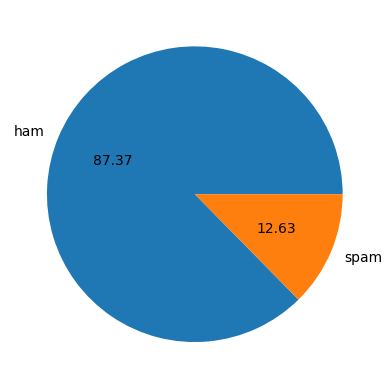

In [23]:
plt.pie(data['target'].value_counts(), labels= ['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# no of character used in sentence
data['char_num']=data['text'].apply(len)


C:\Users\Rohit\AppData\Local\Temp\ipykernel_28804\683869260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['char_num']=data['text'].apply(len)


In [27]:
data

,target,text,char_num
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [28]:
#  words in the text column
data['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [29]:
# no of words in the text column
data['num_words']=data['text'].apply(lambda x:len( nltk.word_tokenize(x)))

#word_tokenize use to tokenize each word seperately

C:\Users\Rohit\AppData\Local\Temp\ipykernel_28804\2399108178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']=data['text'].apply(lambda x:len( nltk.word_tokenize(x)))


In [30]:
data

,target,text,char_num,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [31]:
#  sentence in the text column
data['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [32]:
# number of sentence in the text column
data['no_of_sent']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Rohit\AppData\Local\Temp\ipykernel_28804\494019279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no_of_sent']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [33]:
data

,target,text,char_num,num_words,no_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [34]:
#describe 
data[['char_num','num_words','no_of_sent']].describe()

,char_num,num_words,no_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
# for ham massages
data[data['target']==0][['char_num','num_words','no_of_sent']].describe()

,char_num,num_words,no_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
# for spam massages
data[data['target']==1][['char_num','num_words','no_of_sent']].describe()

,char_num,num_words,no_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [37]:
import seaborn as sns

<AxesSubplot: xlabel='char_num', ylabel='Count'>

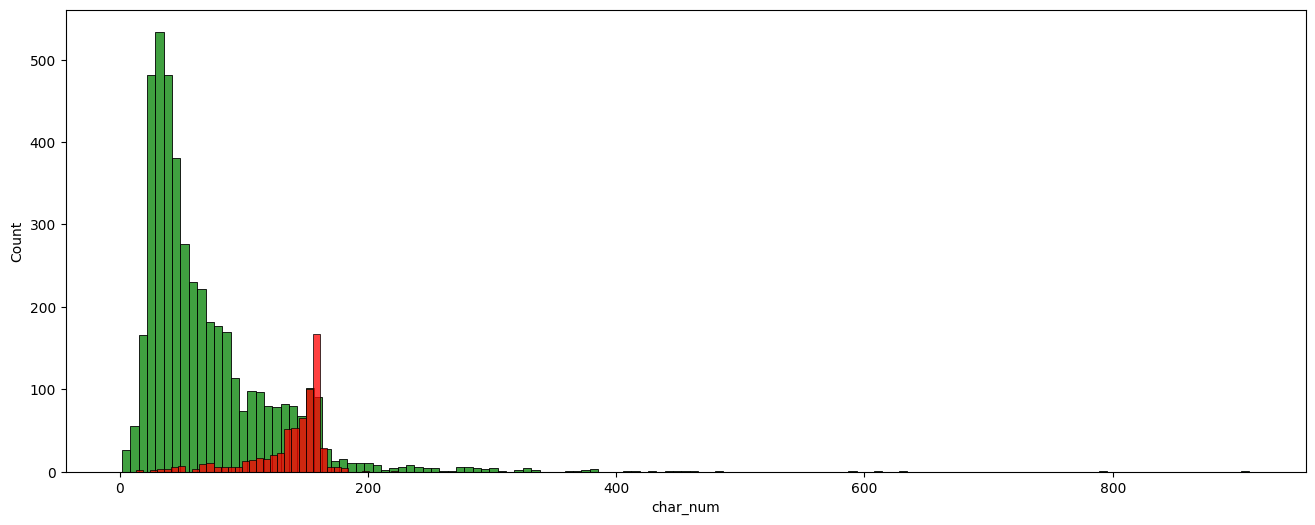

In [38]:
plt.figure(figsize=(16,6))
sns.histplot(data[data['target']==0]['char_num'],color='green')
sns.histplot(data[data['target']==1]['char_num'],color='red')

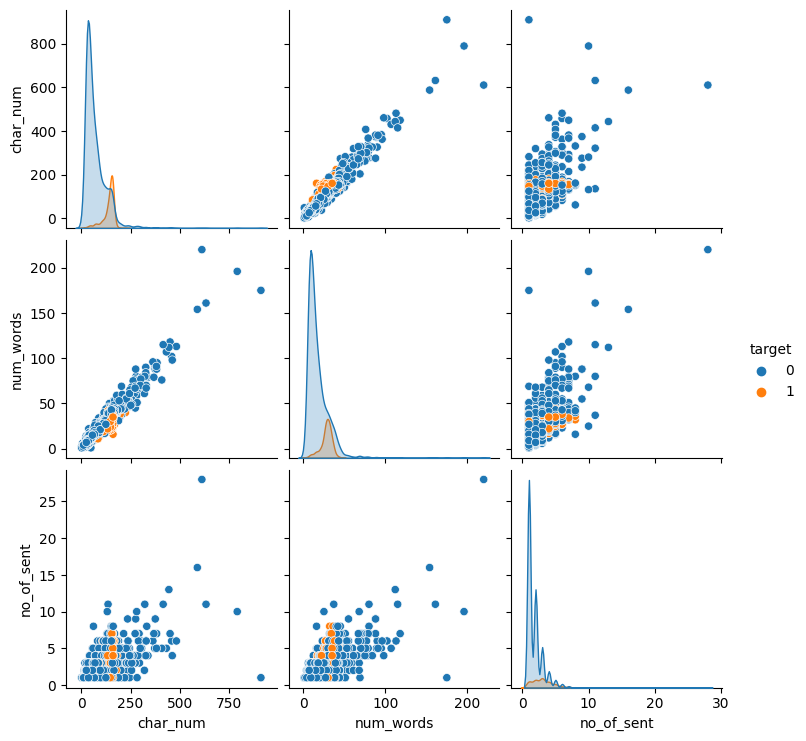

In [39]:
sns.pairplot(data, hue='target')

In [40]:
data.corr()

C:\Users\Rohit\AppData\Local\Temp\ipykernel_28804\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,char_num,num_words,no_of_sent
target,1.000000,0.384717,0.262984,0.284901
char_num,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
no_of_sent,0.284901,0.638143,0.684541,1.000000


C:\Users\Rohit\AppData\Local\Temp\ipykernel_28804\3818546950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)# annot =true show the value of correlation in the box


<AxesSubplot: >

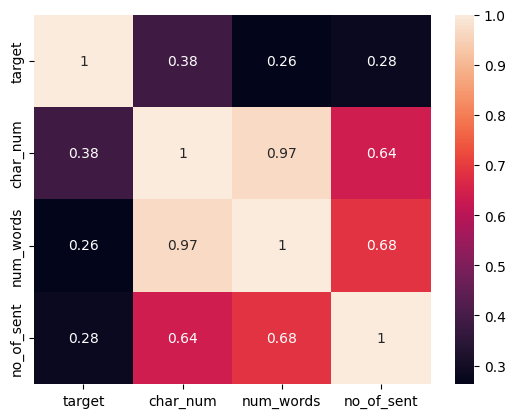

In [41]:
sns.heatmap(data.corr(),annot=True)# annot =true show the value of correlation in the box


# 3) data preprocessing

lower case

tokenization

removing special cherecters

removing stop words and punctuations

steamming

#lower case
def transform_lower(text):
    text=text.lower()
    
    return text

transform_lower("how aree you doing")

#tokenization
def tokenize(text):
    text=nltk.word_tokenize(text)
    
    
    return text
tokenize("how are you doing")

In [42]:
# preprocessing function
def transform_text(text):
    text = str(text).lower()
    text = nltk.word_tokenize(text)
    
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
            
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " " .join(y), len(y)

In [43]:
#sample text

transform_text("How are You %% doing RoHIt, I heard that you getting the job as data scientist")

('rohit heard get job data scientist', 6)

In [44]:
# so in this above code first it converted text into lower case
# second then tokenize the sentence (seperated with comma) whether it is alphanumeric objects
# third removed the special characters 
# forth removed stop words from english and punctuation marks 
# fifth converted past form , future from words into there original form, for ex: getting converted to got

In [45]:
# sample text from the text
transform_text(data['text'][2])

('free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 24)

In [46]:
data['text'].apply(transform_text)

0       (go jurong point crazi avail bugi n great worl...
1                              (ok lar joke wif u oni, 6)
2       (free entri 2 wkli comp win fa cup final tkt 2...
3                (u dun say earli hor u c alreadi say, 9)
4               (nah think goe usf live around though, 7)
                              ...                        
5567    (2nd time tri 2 contact u pound prize 2 claim ...
5568                           (b go esplanad fr home, 5)
5569                               (piti mood suggest, 3)
5570    (guy bitch act like interest buy someth els ne...
5571                                  (rofl true name, 3)
Name: text, Length: 5169, dtype: object

In [47]:
data.loc[:,'transformed_text']=data['text'].apply(transform_text)

C:\Users\Rohit\AppData\Local\Temp\ipykernel_28804\1995952256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'transformed_text']=data['text'].apply(transform_text)


In [48]:
data

,target,text,char_num,num_words,no_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,(go jurong point crazi avail bugi n great worl...
1,0,Ok lar... Joking wif u oni...,29,8,2,"(ok lar joke wif u oni, 6)"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,(free entri 2 wkli comp win fa cup final tkt 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,"(u dun say earli hor u c alreadi say, 9)"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"(nah think goe usf live around though, 7)"
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,(2nd time tri 2 contact u pound prize 2 claim ...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,"(b go esplanad fr home, 5)"
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"(piti mood suggest, 3)"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,(guy bitch act like interest buy someth els ne...


In [49]:
from wordcloud import WordCloud
wc= WordCloud(width=350,height=200, min_font_size=10, background_color='white')

In [50]:
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].astype(str). str.cat(sep=" "))

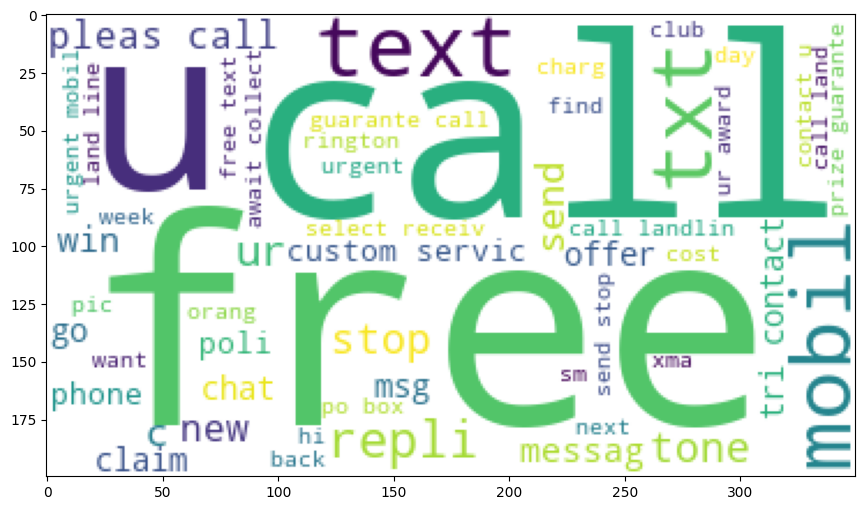

In [51]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [52]:
ham_wc=wc.generate(data[data['target']==0]['transformed_text'].astype(str). str.cat(sep=" "))



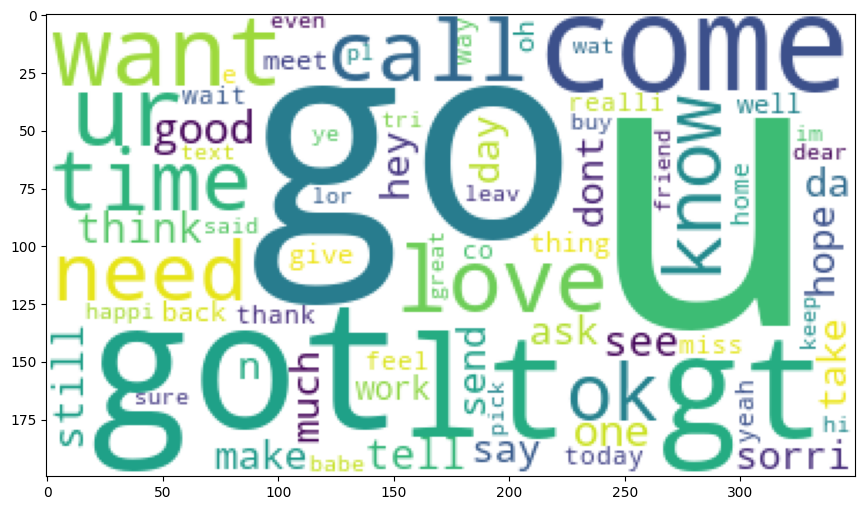

In [53]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

### TOP WORDS USED IN SPAM MASSAGES

In [54]:
spam_corpus = []
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in str(msg).split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

10592

In [56]:
from collections import Counter # it counts the number of time a word appear


In [57]:
Counter(spam_corpus).most_common(30)

[('call', 305),
 ('free', 158),
 ('2', 154),
 ('txt', 137),
 ('text', 118),
 ('mobil', 106),
 ('u', 99),
 ('repli', 99),
 ('ur', 99),
 ('claim', 96),
 ('4', 96),
 ('stop', 90),
 ('prize', 78),
 ('18)', 73),
 ('get', 65),
 ('tone', 61),
 ('servic', 60),
 ('new', 58),
 ('send', 57),
 ('nokia', 55),
 ('13)', 55),
 ('contact', 53),
 ('14)', 53),
 ('16)', 52),
 ('award', 52),
 ('phone', 52),
 ('cash', 48),
 ("('urgent", 48),
 ('week', 47),
 ('15)', 47)]

In [58]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,305
1,free,158
2,2,154
3,txt,137
4,text,118
5,mobil,106
6,u,99
7,repli,99
8,ur,99
9,claim,96


In [59]:
word_counts = Counter(spam_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])



df_word_counts


,Word,Count
0,call,305
1,free,158
2,2,154
3,txt,137
4,text,118
5,mobil,106
6,u,99
7,repli,99
8,ur,99
9,claim,96


In [60]:
word_counts

[('call', 305),
 ('free', 158),
 ('2', 154),
 ('txt', 137),
 ('text', 118),
 ('mobil', 106),
 ('u', 99),
 ('repli', 99),
 ('ur', 99),
 ('claim', 96),
 ('4', 96),
 ('stop', 90),
 ('prize', 78),
 ('18)', 73),
 ('get', 65),
 ('tone', 61),
 ('servic', 60),
 ('new', 58),
 ('send', 57),
 ('nokia', 55),
 ('13)', 55),
 ('contact', 53),
 ('14)', 53),
 ('16)', 52),
 ('award', 52),
 ('phone', 52),
 ('cash', 48),
 ("('urgent", 48),
 ('week', 47),
 ('15)', 47)]

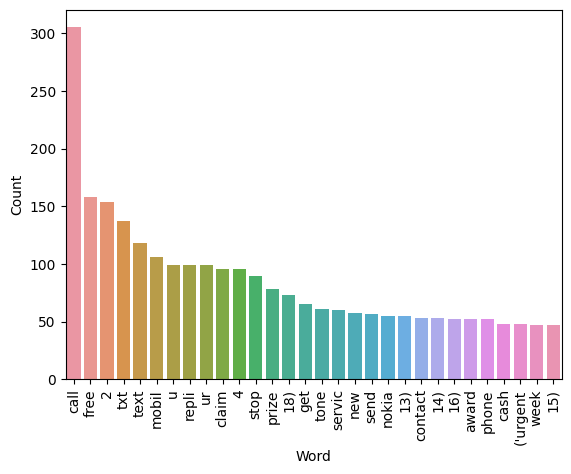

In [61]:
# Plot the bar chart
sns.barplot(data=df_word_counts, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

###  top words used in ham corpus

In [62]:
ham_corpus = []
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in str(msg).split():
        ham_corpus.append(word)

In [63]:
len(ham_corpus)

39919

In [64]:
ham_word_count=Counter(ham_corpus).most_common(30)
ham_word_count

[('u', 717),
 ('4)', 587),
 ('3)', 539),
 ('5)', 508),
 ('6)', 407),
 ('go', 353),
 ('7)', 321),
 ('2)', 310),
 ('get', 295),
 ('8)', 277),
 ('lt', 271),
 ('2', 270),
 ('gt', 242),
 ('9)', 212),
 ('come', 205),
 ('like', 196),
 ('got', 186),
 ('ur', 185),
 ('time', 175),
 ('know', 173),
 ('want', 169),
 ('call', 168),
 ('love', 166),
 ('11)', 161),
 ('10)', 160),
 ('4', 150),
 ('good', 146),
 ('need', 143),
 ('day', 139),
 ('12)', 135)]

In [65]:
ham_word_count= pd.DataFrame(ham_word_count, columns=['word', 'count'])
ham_word_count

,word,count
0,u,717
1,4),587
2,3),539
3,5),508
4,6),407
5,go,353
6,7),321
7,2),310
8,get,295
9,8),277


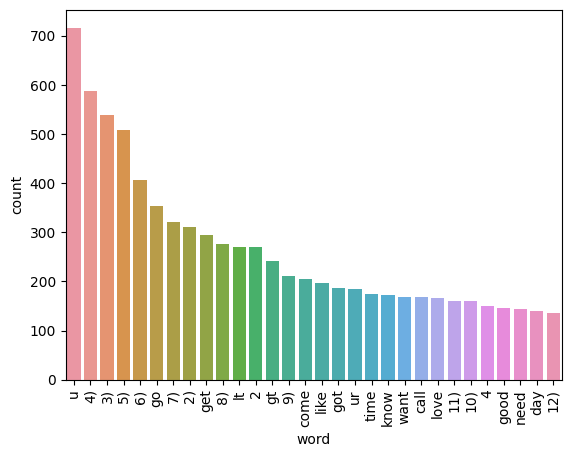

In [66]:
sns.barplot(data=ham_word_count, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()


# model building 

In [67]:
#generally naive baye's works good on textual data

In [68]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [69]:
data

,target,text,char_num,num_words,no_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,(go jurong point crazi avail bugi n great worl...
1,0,Ok lar... Joking wif u oni...,29,8,2,"(ok lar joke wif u oni, 6)"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,(free entri 2 wkli comp win fa cup final tkt 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,"(u dun say earli hor u c alreadi say, 9)"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"(nah think goe usf live around though, 7)"
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,(2nd time tri 2 contact u pound prize 2 claim ...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,"(b go esplanad fr home, 5)"
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"(piti mood suggest, 3)"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,(guy bitch act like interest buy someth els ne...


In [70]:
data['transformed_text'] = [' '.join(map(str, text_tuple)) if isinstance(text_tuple, tuple) else str(text_tuple) for text_tuple in data['transformed_text']]


C:\Users\Rohit\AppData\Local\Temp\ipykernel_28804\3540007723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = [' '.join(map(str, text_tuple)) if isinstance(text_tuple, tuple) else str(text_tuple) for text_tuple in data['transformed_text']]


#### model with countvectorizer

In [71]:
#with countvectorizer 
x = cv.fit_transform(data['transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
x.shape

(5169, 6731)

In [73]:
y=data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
y.shape

(5169,)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [78]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [79]:
#GaussianNB with countvectorizer 
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print("accuracy of the model is",round(accuracy_score(y_test, y_pred1)*100,2),"%")
print(confusion_matrix(y_test, y_pred1))
print("precision score of the model is ",round(precision_score(y_test, y_pred1),2))

accuracy of the model is 87.91 %
[[792 104]
 [ 21 117]]
precision score of the model is  0.53


In [80]:
#MultinomialNB with countvectorizer 
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)
print(" accuracy of the model is ",round(accuracy_score(y_test, y_pred2)*100,2),"%")
print(confusion_matrix(y_test, y_pred2))
print("precision score of the model is",round(precision_score(y_test, y_pred2),2))

 accuracy of the model is  96.62 %
[[872  24]
 [ 11 127]]
precision score of the model is 0.84


In [81]:
#BernoulliNB with countvectorizer 
bnb.fit(x_train, y_train)
y_pred3=bnb.predict(x_test)
print(" accuracy of the model is ",round(accuracy_score(y_test, y_pred3)*100,2),"%")
print(confusion_matrix(y_test, y_pred3))
print("precision score of the model is",round(precision_score(y_test, y_pred3),2))

 accuracy of the model is  97.0 %
[[892   4]
 [ 27 111]]
precision score of the model is 0.97


####  model with TfidfVectorizer

In [82]:
#with TfidfVectorizer
x = tfidf.fit_transform(data['transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
x.shape

(5169, 6731)

In [84]:
y=data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [85]:
x_train,x_test, y_train, y_test= train_test_split(x,y , test_size=0.2, random_state=2)

In [86]:
#GaussianNB with TfidfVectorizer 
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print("accuracy of the model is",round(accuracy_score(y_test, y_pred1)*100,2),"%")
print(confusion_matrix(y_test, y_pred1))
print("precision score of the model is ",round(precision_score(y_test, y_pred1),2))

accuracy of the model is 87.43 %
[[793 103]
 [ 27 111]]
precision score of the model is  0.52


In [87]:
#MultinomialNB with TfidfVectorizer 
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)
print(" accuracy of the model is ",round(accuracy_score(y_test, y_pred2)*100,2),"%")
print(confusion_matrix(y_test, y_pred2))
print("precision score of the model is",round(precision_score(y_test, y_pred2),2))

 accuracy of the model is  95.55 %
[[896   0]
 [ 46  92]]
precision score of the model is 1.0


In [88]:
#BernoulliNB with TfidfVectorizer 
bnb.fit(x_train, y_train)
y_pred3=bnb.predict(x_test)
print(" accuracy of the model is ",round(accuracy_score(y_test, y_pred3)*100,2),"%")
print(confusion_matrix(y_test, y_pred3))
print("precision score of the model is",round(precision_score(y_test, y_pred3),2))

 accuracy of the model is  97.0 %
[[892   4]
 [ 27 111]]
precision score of the model is 0.97


in this above models "MultinomialNB with TfidfVectorizer" has precision score is 1.0 it means there is not a single email that is not spam and and it predicted as spam 

In [89]:
#tfidf with mnb

In [90]:
#with tfidf vectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [91]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [92]:
# create a dictionary named classifier
clfs = {
     'svc':svc,
     'knc':knc,
     'mnb':mnb,
     'dtc':dtc,
     'rfc':rfc,
     'abc':abc,
     'bc':bc,
     'gbdt':gbdt,
     'xgb':xgb
 }

In [93]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred= clf.predict(x_test)
    accuracy= accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [94]:
train_classifier(svc,  x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [95]:
accuracy_scores = []
precision_scores = []

for name ,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,  x_train, y_train, x_test, y_test)
    
    print("for", name)
    print("accuracy", current_accuracy)
    print("precision", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for svc
accuracy 0.9758220502901354
precision 0.9747899159663865
for knc
accuracy 0.8984526112185687
precision 1.0
for mnb
accuracy 0.9555125725338491
precision 1.0
for dtc
accuracy 0.937137330754352
precision 0.8476190476190476
for rfc
accuracy 0.9700193423597679
precision 1.0
for abc
accuracy 0.960348162475822
precision 0.9217391304347826
for bc
accuracy 0.9574468085106383
precision 0.8671875
for gbdt
accuracy 0.9526112185686654
precision 0.9320388349514563
for xgb
accuracy 0.9700193423597679
precision 0.9212598425196851


In [96]:
performance_df= pd.DataFrame({'algorithms':clfs.keys(),'accuracy': accuracy_scores, 'precision': precision_scores}).sort_values('precision',ascending=False)

In [97]:
performance_df

,algorithms,accuracy,precision
1,knc,0.898453,1.000000
2,mnb,0.955513,1.000000
4,rfc,0.970019,1.000000
0,svc,0.975822,0.974790
7,gbdt,0.952611,0.932039
5,abc,0.960348,0.921739
8,xgb,0.970019,0.921260
6,bc,0.957447,0.867188
3,dtc,0.937137,0.847619


In [98]:
performance_df1 = pd.melt(performance_df, id_vars='algorithms')

In [99]:
performance_df1

,algorithms,variable,value
0,knc,accuracy,0.898453
1,mnb,accuracy,0.955513
2,rfc,accuracy,0.970019
3,svc,accuracy,0.975822
4,gbdt,accuracy,0.952611
5,abc,accuracy,0.960348
6,xgb,accuracy,0.970019
7,bc,accuracy,0.957447
8,dtc,accuracy,0.937137
9,knc,precision,1.000000


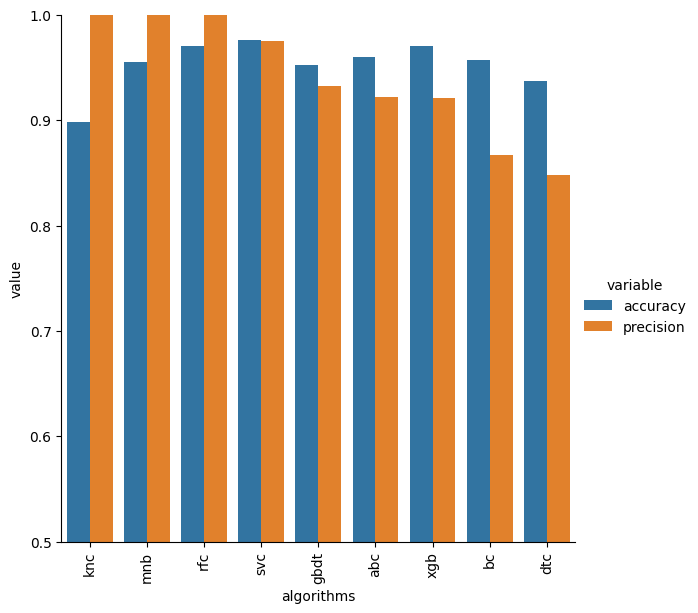

In [100]:
sns.catplot(x='algorithms', y='value',
           hue='variable', data=performance_df1,kind='bar',height=6)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [101]:
# from the table performance_df1 we conclude that the best algorithm is random forest classifier with precision and accuracy of 1.0 and 0.97 

In [102]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))
